# The {class}`dawsonia.io.Book` dataclass and the Python API

Dawsonia comes with a {module}`dawsonia.io` to create an API for reading PDF and Zarr files in a uniform way. It
is used internally for feeding data into the digitization pipeline. Here we can see how it works:

In [23]:
from dawsonia.io import read_book

first, last, bjuro_1927 = read_book("data/raw_zarr/bjuröklubb_example/bjuröklubb_1927.zarr", first_page=3)
print("page range is", first, "to", last)

INFO     2024-05-17 17:19:05,431 - dawsonia.io._zarr - INFO - table_format = TableFormat(name_idx='tid',           
         columns=[['term_på_baro', 'barom', 'torra_term', 'våta_term', 'moln_slag_lägre', 'moln_mängd_lägre',      
         'moln_slag_högre', 'moln_mängd_total'], ['vind_riktning', 'vind_beaufort', 'vind_m_sek', 'sikt',          
         'sjögang', 'maximi_term', 'minimi_term', 'nederbörd_mängd', 'nederbörd_slag']], rows=(datetime.time(2, 0),
         datetime.time(8, 0), datetime.time(14, 0), datetime.time(19, 0), datetime.time(21, 0)), tables=[[5, 8],   
         [5, 9], [3, 1], [4, 2], [4, 5]], preproc=PreprocConfig(table_modif=True, corr_rotate=True,                
         row_idx_unit=<TimeUnits.HOURS: 1>, idx_tables_size_verify=[0, 1]), transforms=None, version='1',          
         station='bjuröklubb_example')

INFO     2024-05-17 17:19:05,442 - dawsonia.io._zarr - INFO - Setting first_page = 3

INFO     2024-05-17 17:19:05,447 - dawsonia.io._zarr - INFO - Setting last_page_number = max_pages

page range is 3 to 7


In [17]:
first, last, bjuro_1930 = read_book("data/raw_zarr/bjuröklubb_example/bjuröklubb_1930.zarr")
print("page range is", first, "to", last)

INFO     2024-05-17 17:13:43,385 - dawsonia.io._zarr - INFO - table_format = TableFormat(name_idx='tid',           
         columns=[['term_på_baro', 'barom', 'torra_term', 'våta_term', 'moln_slag_lägre', 'moln_mängd_lägre',      
         'moln_slag_medel', 'moln_slag_högre'], ['moln_het_sol_dimma_nederbörd_total', 'vind_riktning',            
         'vind_beaufort', 'vind_m_sek', 'sikt', 'sjögang', 'maximi_term', 'minimi_term', 'nederbörd_mängd',        
         'nederbörd_slag']], rows=(datetime.time(2, 0), datetime.time(8, 0), datetime.time(14, 0),                 
         datetime.time(19, 0), datetime.time(21, 0)), tables=[[5, 8], [5, 10], [3, 1], [4, 2], [4, 5]],            
         preproc=PreprocConfig(table_modif=True, corr_rotate=True, row_idx_unit=<TimeUnits.HOURS: 1>,              
         idx_tables_size_verify=[0, 1]), transforms=None, version='0', station='bjuröklubb')

INFO     2024-05-17 17:13:43,402 - dawsonia.io._zarr - INFO - Setting first_page = 1

INFO     2024-05-17 17:13:43,407 - dawsonia.io._zarr - INFO - Setting last_page_number = max_pages

page range is 1 to 372


We can read image objects.

INFO     2024-05-17 17:14:07,972 - dawsonia.io._zarr - INFO - Setting first_page = 3

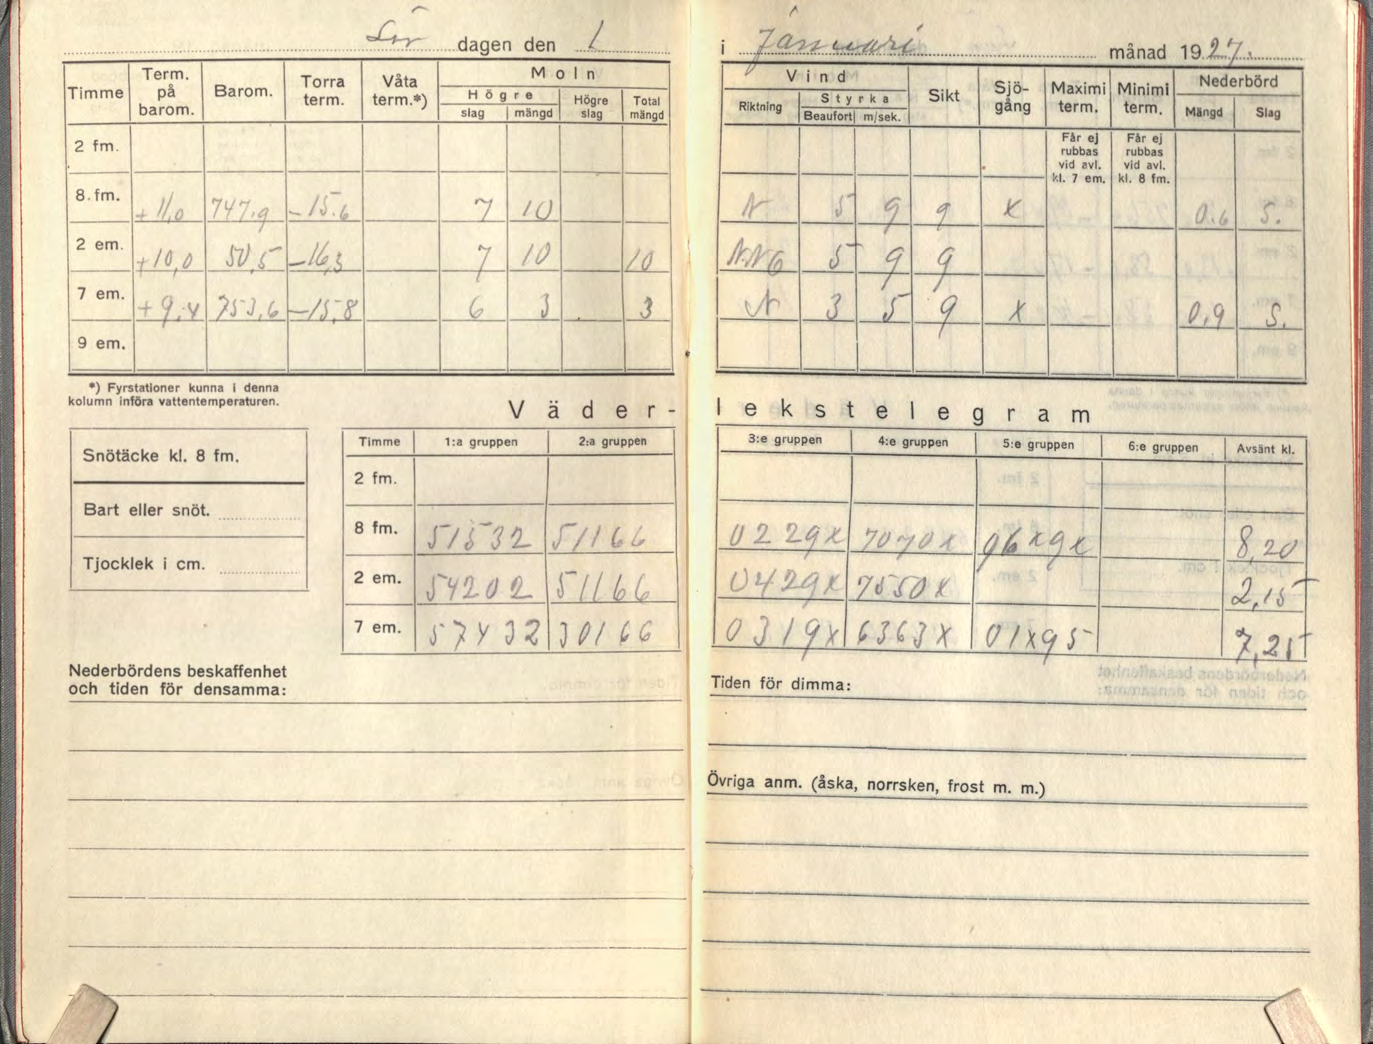

In [20]:
bjuro_1927.read_image(3)

We can also directly obtain array representations after decoding the image object.

In [21]:
im_array = bjuro_1927.read_page(3)
print(type(im_array))
im_array.shape

INFO     2024-05-17 17:15:46,461 - dawsonia.io._zarr - INFO - Setting first_page = 3

<class 'numpy.ndarray'>


(1044, 1373, 3)

The `Book` instance also holds a copy of the `TableFormat` dataclass

In [22]:
bjuro_1927.table_format

TableFormat(name_idx='tid', columns=[['term_på_baro', 'barom', 'torra_term', 'våta_term', 'moln_slag_lägre', 'moln_mängd_lägre', 'moln_slag_högre', 'moln_mängd_total'], ['vind_riktning', 'vind_beaufort', 'vind_m_sek', 'sikt', 'sjögang', 'maximi_term', 'minimi_term', 'nederbörd_mängd', 'nederbörd_slag']], rows=(datetime.time(2, 0), datetime.time(8, 0), datetime.time(14, 0), datetime.time(19, 0), datetime.time(21, 0)), tables=[[5, 8], [5, 9], [3, 1], [4, 2], [4, 5]], preproc=PreprocConfig(table_modif=True, corr_rotate=True, row_idx_unit=<TimeUnits.HOURS: 1>, idx_tables_size_verify=[0, 1]), transforms=None, version='1', station='bjuröklubb_example')